<a href="https://colab.research.google.com/github/hafsakhaerunisa/ADM-Case-Study2-Cluster-Analysis-Kelompok7/blob/main/Case_Study_02_Kelompok7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-07 08:33:36--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.7’

tau_unsup.py.7      100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2022-10-07 08:33:36 (32.7 MB/s) - ‘tau_unsup.py.7’ saved [17387/17387]



In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum
import umap
import tau_unsup as tau, matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

#1. Pre-Processing Data

Ditemukan pada dataset asal banyak data yang tidak valid sehingga dilakukan pembersihan data menggunakan excel. Untuk kedepannya disarankan kepada perusahan MixITup agar pengumpulan data dapat dilakukan lebih teliti. misal: pada variabel kategorik bisa diberikan pilihan setiap kategorinya.

In [223]:
df_ice=pd.read_csv('https://raw.githubusercontent.com/hafsakhaerunisa/ADM-Case-Study2-Cluster-Analysis-Kelompok7/main/icefix.csv',low_memory = False, encoding='utf8')
pd.DataFrame(df_ice)

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754.0,52,Menikah,Jakarta,Jarang,Sabtu,Charcoal
1,102,Wanita,32,33606557.0,86,Menikah,Depok,Jarang,Minggu,Coconut
2,103,Pria,51,15983606.0,41,Menikah,Jakarta,Sedang,Minggu,Cokelat
3,104,Pria,19,12704918.0,55,Belum Menikah,Jakarta,Jarang,Rabu,Caramel Pecan
4,105,Wanita,38,20081967.0,42,Menikah,Jakarta,Sedang,Senin,Mix Flavors
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360.0,73,Menikah,Depok,Jarang,Senin,Vanilla
196,297,Pria,57,15983606.0,51,Menikah,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy
197,298,Wanita,35,43032786.0,79,Menikah,Depok,Jarang,Senin,Caramel Pecan
198,299,Wanita,23,1229508.0,94,Menikah,Depok,Tidak Pernah,Selasa,Vanilla


Kolom ID dihapus karena ID pelanggan merupakan identitas yang tidak digunakan untuk memproses data.

In [224]:
#Drop Kolom ID
df_ice.drop(columns='ID', inplace=True)
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,Menikah,Jakarta,Jarang,Sabtu,Charcoal
1,Wanita,32,33606557.0,86,Menikah,Depok,Jarang,Minggu,Coconut
2,Pria,51,15983606.0,41,Menikah,Jakarta,Sedang,Minggu,Cokelat
3,Pria,19,12704918.0,55,Belum Menikah,Jakarta,Jarang,Rabu,Caramel Pecan
4,Wanita,38,20081967.0,42,Menikah,Jakarta,Sedang,Senin,Mix Flavors
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,Menikah,Depok,Jarang,Senin,Vanilla
196,Pria,57,15983606.0,51,Menikah,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy
197,Wanita,35,43032786.0,79,Menikah,Depok,Jarang,Senin,Caramel Pecan
198,Wanita,23,1229508.0,94,Menikah,Depok,Tidak Pernah,Selasa,Vanilla


## Missing Values

Note:
- Terdapat beberapa missing values pada kolom semua kolom.
- Untuk kolom 'menikah' yang memiliki sekitar 6,5% missing values akan ditanganni dengan melakukan drop kolom. sehingga akan sangat sulit untuk dilakukan interpretasi terhadap data dan kurang dapat menjelaskan populasi yang ada. Dengan demikian, kami merekomendasikan untuk melakukan dropping kolom.

In [225]:
# Amount of missing values for every colomn
df_ice.isnull().sum()

Jenis Kelamin            5
Umur                     0
Pendapatan-per-bulan     2
skor-pengeluaran         0
Menikah                 13
Kota                     0
Promo                    7
HariFav                  0
FavFlavor                1
dtype: int64

In [226]:
# Proportion Missing Values for every colomn
df_ice.isnull().sum()/df_ice.shape[0]

Jenis Kelamin           0.025
Umur                    0.000
Pendapatan-per-bulan    0.010
skor-pengeluaran        0.000
Menikah                 0.065
Kota                    0.000
Promo                   0.035
HariFav                 0.000
FavFlavor               0.005
dtype: float64

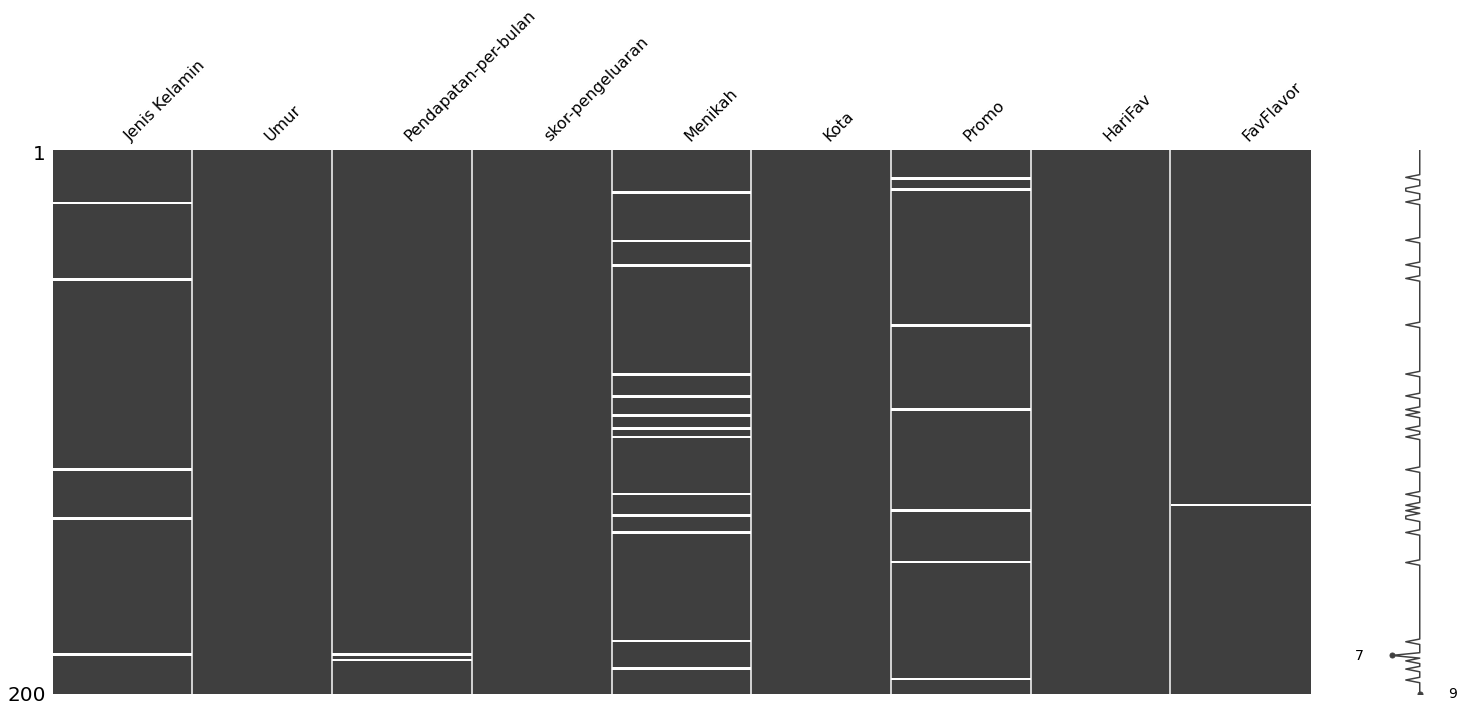

In [227]:
#Heatmap Missing Value
msnum.matrix(df_ice)

In [228]:
#Drop Kolom Menikah karena proporsi missing value tinggi
df_ice.drop(columns='Menikah', inplace=True)
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,Jakarta,Jarang,Sabtu,Charcoal
1,Wanita,32,33606557.0,86,Depok,Jarang,Minggu,Coconut
2,Pria,51,15983606.0,41,Jakarta,Sedang,Minggu,Cokelat
3,Pria,19,12704918.0,55,Jakarta,Jarang,Rabu,Caramel Pecan
4,Wanita,38,20081967.0,42,Jakarta,Sedang,Senin,Mix Flavors
...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,Depok,Jarang,Senin,Vanilla
196,Pria,57,15983606.0,51,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy
197,Wanita,35,43032786.0,79,Depok,Jarang,Senin,Caramel Pecan
198,Wanita,23,1229508.0,94,Depok,Tidak Pernah,Selasa,Vanilla


In [229]:
#mengisi missing value
df_ice['Promo'] = df_ice['Promo'].fillna(df_ice['Promo'].mode()[0])
df_ice['Jenis Kelamin'] = df_ice['Jenis Kelamin'].fillna(df_ice['Jenis Kelamin'].mode()[0])
df_ice['Pendapatan-per-bulan'] = df_ice['Pendapatan-per-bulan'].fillna(df_ice['Pendapatan-per-bulan'].mode()[0])
df_ice['FavFlavor'] = df_ice['FavFlavor'].fillna(df_ice['FavFlavor'].mode()[0])
df_ice

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754.0,52,Jakarta,Jarang,Sabtu,Charcoal
1,Wanita,32,33606557.0,86,Depok,Jarang,Minggu,Coconut
2,Pria,51,15983606.0,41,Jakarta,Sedang,Minggu,Cokelat
3,Pria,19,12704918.0,55,Jakarta,Jarang,Rabu,Caramel Pecan
4,Wanita,38,20081967.0,42,Jakarta,Sedang,Senin,Mix Flavors
...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,Depok,Jarang,Senin,Vanilla
196,Pria,57,15983606.0,51,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy
197,Wanita,35,43032786.0,79,Depok,Jarang,Senin,Caramel Pecan
198,Wanita,23,1229508.0,94,Depok,Tidak Pernah,Selasa,Vanilla


In [230]:
df_ice.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [231]:
print(df_ice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         200 non-null    object 
 1   Umur                  200 non-null    int64  
 2   Pendapatan-per-bulan  200 non-null    float64
 3   skor-pengeluaran      200 non-null    int64  
 4   Kota                  200 non-null    object 
 5   Promo                 200 non-null    object 
 6   HariFav               200 non-null    object 
 7   FavFlavor             200 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB
None


## Penyesuaian Data Understanding
Dari Data Understanding yang diberikan oleh bagian administrasi loyality program MixITup, ditemukan beberapa kategori data yang tidak terdapat penjelasan yaitu pada kategori seberapa sering customer menggunakan promonya ( kolom Promo) kategori Rasa Ice Cream yang paling sering dipilih customer (kolom FavFlavor). Berikut beberapa penyesuaian yang dilakukan :


1.   Promo

> Terdapat satu observasi berisi nilai 5, dimana untuk penjelasan hanya berisi kategori 0, 1, 2, dan 3. Observasi ini untuk analisis seterusnya diubah menjadi missing value, dengan alasan hanya terdapat satu observasi dari seluruh data yang bernilai 5 dan tidak terdapat observasi bernilai 4



2.   FavFlavor

> Terdapat observasi berisi nilai 2 dan 9 yang tidak terdapat penjelasan. Oleh karena itu, untuk observasi bernilai 2, kami menambahkan asumsi rasa lain, yaitu "Charcoal". Dikarenakan hanya terdapat satu observasi bernilai 9, maka kami merubah nilai 9 menjadi missing value.

Selanjutnya, kami memutuskan untuk tidak menggunakan kategori status pernikahan customer (Menikah), dikarenakan proporsi missing value pada variabel ini lebih banyak daripada proporsi missing value variabel-variabel lainnya.

#2. EDA

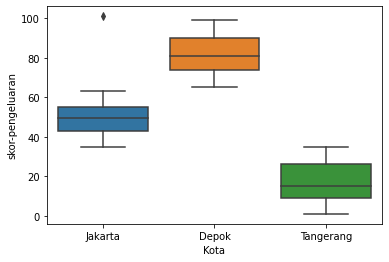

In [232]:
# BoxPlots 
p = sns.boxplot(x="Kota", y="skor-pengeluaran", data=df_ice)

Interpretasi:

> Dari box plot kota terhadap skor pengeluaran customer loyalty program MixITup, didapatkan bahwa customer cabang MixITup kota Depok memiliki skor pengeluaran lebih tinggi dibanding cabang kota Jakarta ataupun Tangerang. Sehingga direkomendasikan untuk membuka cabang baru di sekitar kota Depok yang diharapkan dapat menarik lebih banyak customer di daerah sekitar kota Depok.

In [233]:
df_harifav=df_ice['HariFav'].value_counts()
df_harifav

Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Rabu       5
Jumat      5
Name: HariFav, dtype: int64

In [234]:
#buat data frame
data = {'Hari': ['Senin', 'Selasa', 'Rabu', 'Kamis','Jumat','Sabtu','Minggu'], 'Jumlah': [66, 21, 5, 6,5,54,43]}  
df_harifav = pd.DataFrame(data)
print(df_harifav)

     Hari  Jumlah
0   Senin      66
1  Selasa      21
2    Rabu       5
3   Kamis       6
4   Jumat       5
5   Sabtu      54
6  Minggu      43


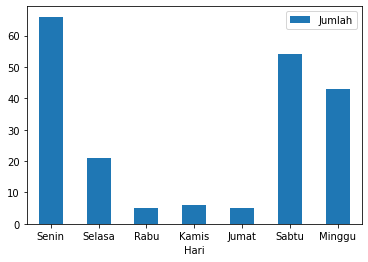

In [235]:
ax = df_harifav.plot.bar(x='Hari', y='Jumlah', rot=0)

Interpretasi:
> Dari plot frekuensi hari favorit customer loyalty program MixITup, didapatkan bahwa hari Rabu, Kamis, dan Jumat adalah hari-hari favorit untuk sedikit customer. Untuk meningkatkan penjualan pada hari Rabu, Kamis, dan Jumat, kami menyarankan untuk membuat promosi khusus di hari-hari ini.

#3. Clustering Analysis

Note:
- akan dibuat variabel dummy dari variabel-variabel kategorik
- setelah dibuat variabel dummy data akan di standardisasi untuk menyetarakan satuan nilai variabel
- akan digunakan kmeans untuk mencari jumlah klasternya dengan menggunakan variabel independen 'Kota' dan 'Promo sedangkan variabel dependennya adalah 'skor-pengeluaran'

In [236]:
print(df_ice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         200 non-null    object 
 1   Umur                  200 non-null    int64  
 2   Pendapatan-per-bulan  200 non-null    float64
 3   skor-pengeluaran      200 non-null    int64  
 4   Kota                  200 non-null    object 
 5   Promo                 200 non-null    object 
 6   HariFav               200 non-null    object 
 7   FavFlavor             200 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB
None


In [237]:
#membuat Dummy untuk variabel Jenis kelamin
df_ice_sex = pd.get_dummies(df_ice['Jenis Kelamin'])
df_ice_sex.head()

,Pria,Wanita
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [238]:
#membuat Dummy untuk variabel Kota
df_ice_kota = pd.get_dummies(df_ice['Kota'])
df_ice_kota.head()

,Depok,Jakarta,Tangerang
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [239]:
#membuat Dummy untuk variabel Promo
df_ice_promo = pd.get_dummies(df_ice['Promo'])
df_ice_promo.head()

,Jarang,Sedang,Sering,Tidak Pernah
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [240]:
#membuat Dummy untuk variabel Hari Favorit
df_ice_harifav = pd.get_dummies(df_ice['HariFav'])
df_ice_harifav.head()

,Jumat,Kamis,Minggu,Rabu,Sabtu,Selasa,Senin
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1


In [241]:
#membuat Dummy untuk variabel Favorit Flavor
df_ice_favflavor = pd.get_dummies(df_ice['FavFlavor'])
df_ice_favflavor.head()

,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Charcoal,Coconut,Cokelat,Mix Flavors,Strawberry,Vanilla
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [242]:
# Joining databases 
df_full = pd.concat([df_ice,df_ice_sex,df_ice_kota,df_ice_promo,df_ice_harifav,df_ice_favflavor], axis = 1, ignore_index = False)
df_full

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Pria,Wanita,...,Senin,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Charcoal,Coconut,Cokelat,Mix Flavors,Strawberry,Vanilla
0,Wanita,49,13114754.0,52,Jakarta,Jarang,Sabtu,Charcoal,0,1,...,0,0,0,0,1,0,0,0,0,0
1,Wanita,32,33606557.0,86,Depok,Jarang,Minggu,Coconut,0,1,...,0,0,0,0,0,1,0,0,0,0
2,Pria,51,15983606.0,41,Jakarta,Sedang,Minggu,Cokelat,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Pria,19,12704918.0,55,Jakarta,Jarang,Rabu,Caramel Pecan,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Wanita,38,20081967.0,42,Jakarta,Sedang,Senin,Mix Flavors,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360.0,73,Depok,Jarang,Senin,Vanilla,1,0,...,1,0,0,0,0,0,0,0,0,1
196,Pria,57,15983606.0,51,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy,1,0,...,0,0,1,0,0,0,0,0,0,0
197,Wanita,35,43032786.0,79,Depok,Jarang,Senin,Caramel Pecan,0,1,...,1,0,0,1,0,0,0,0,0,0
198,Wanita,23,1229508.0,94,Depok,Tidak Pernah,Selasa,Vanilla,0,1,...,0,0,0,0,0,0,0,0,0,1


In [243]:
#Drop variabel Jenis Kelamin karna akan dibuat variabel dummy
df_full.drop(df_ice.columns[0],axis=1,inplace=True)
df_full

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota,Promo,HariFav,FavFlavor,Pria,Wanita,Depok,...,Senin,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Charcoal,Coconut,Cokelat,Mix Flavors,Strawberry,Vanilla
0,49,13114754.0,52,Jakarta,Jarang,Sabtu,Charcoal,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,32,33606557.0,86,Depok,Jarang,Minggu,Coconut,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,51,15983606.0,41,Jakarta,Sedang,Minggu,Cokelat,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19,12704918.0,55,Jakarta,Jarang,Rabu,Caramel Pecan,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,38,20081967.0,42,Jakarta,Sedang,Senin,Mix Flavors,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31,4098360.0,73,Depok,Jarang,Senin,Vanilla,1,0,1,...,1,0,0,0,0,0,0,0,0,1
196,57,15983606.0,51,Jakarta,Jarang,Minggu,BubbleGum/Cotton Candy,1,0,0,...,0,0,1,0,0,0,0,0,0,0
197,35,43032786.0,79,Depok,Jarang,Senin,Caramel Pecan,0,1,1,...,1,0,0,1,0,0,0,0,0,0
198,23,1229508.0,94,Depok,Tidak Pernah,Selasa,Vanilla,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [244]:
#Drop variabel Kota, Promo, HariFav karna akan dibuat variabel dummy
df_full.drop(df_ice.columns[4:8],axis=1,inplace=True)
df_full

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Pria,Wanita,Depok,Jakarta,Tangerang,Jarang,Sedang,...,Senin,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Charcoal,Coconut,Cokelat,Mix Flavors,Strawberry,Vanilla
0,49,13114754.0,52,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,32,33606557.0,86,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,51,15983606.0,41,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,19,12704918.0,55,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,38,20081967.0,42,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31,4098360.0,73,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
196,57,15983606.0,51,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
197,35,43032786.0,79,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
198,23,1229508.0,94,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [245]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Umur                    200 non-null    int64  
 1   Pendapatan-per-bulan    200 non-null    float64
 2   skor-pengeluaran        200 non-null    int64  
 3   Pria                    200 non-null    uint8  
 4   Wanita                  200 non-null    uint8  
 5   Depok                   200 non-null    uint8  
 6   Jakarta                 200 non-null    uint8  
 7   Tangerang               200 non-null    uint8  
 8   Jarang                  200 non-null    uint8  
 9   Sedang                  200 non-null    uint8  
 10  Sering                  200 non-null    uint8  
 11  Tidak Pernah            200 non-null    uint8  
 12  Jumat                   200 non-null    uint8  
 13  Kamis                   200 non-null    uint8  
 14  Minggu                  200 non-null    ui

In [246]:
#mengubah jenis variabel
df_full['Pria'] = df_full['Pria'].astype('int64')
df_full['Wanita']= df_full['Wanita'].astype('int64')
df_full['Depok'] = df_full['Depok'].astype('int64')
df_full['Jakarta']= df_full['Jakarta'].astype('int64')
df_full['Tangerang'] = df_full['Tangerang'].astype('int64')
df_full['Tidak Pernah'] = df_full['Tidak Pernah'].astype('int64')
df_full['Jarang']= df_full['Jarang'].astype('int64')
df_full['Sedang'] = df_full['Sedang'].astype('int64')
df_full['Sering']= df_full['Sering'].astype('int64')
df_full['Senin'] = df_full['Senin'].astype('int64')
df_full['Selasa']= df_full['Selasa'].astype('int64')
df_full['Rabu'] = df_full['Rabu'].astype('int64')
df_full['Kamis']= df_full['Kamis'].astype('int64')
df_full['Jumat'] = df_full['Jumat'].astype('int64')
df_full['Sabtu']= df_full['Sabtu'].astype('int64')
df_full['Minggu'] = df_full['Minggu'].astype('int64')
df_full['Vanilla']= df_full['Vanilla'].astype('int64')
df_full['Strawberry'] = df_full['Strawberry'].astype('int64')
df_full['Charcoal'] = df_full['Charcoal'].astype('int64')
df_full['Cokelat']= df_full['Cokelat'].astype('int64')
df_full['BlueBerry'] = df_full['BlueBerry'].astype('int64')
df_full['BubbleGum/Cotton Candy']= df_full['BubbleGum/Cotton Candy'].astype('int64')
df_full['Coconut'] = df_full['Coconut'].astype('int64')
df_full['Caramel Pecan']= df_full['Caramel Pecan'].astype('int64')
df_full['Mix Flavors'] = df_full['Mix Flavors'].astype('int64')

In [247]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Umur                    200 non-null    int64  
 1   Pendapatan-per-bulan    200 non-null    float64
 2   skor-pengeluaran        200 non-null    int64  
 3   Pria                    200 non-null    int64  
 4   Wanita                  200 non-null    int64  
 5   Depok                   200 non-null    int64  
 6   Jakarta                 200 non-null    int64  
 7   Tangerang               200 non-null    int64  
 8   Jarang                  200 non-null    int64  
 9   Sedang                  200 non-null    int64  
 10  Sering                  200 non-null    int64  
 11  Tidak Pernah            200 non-null    int64  
 12  Jumat                   200 non-null    int64  
 13  Kamis                   200 non-null    int64  
 14  Minggu                  200 non-null    in

In [248]:
#standardisasi data
df_standar=(df_full-df_full.mean())/df_full.std()
df_standar

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Pria,Wanita,Depok,Jakarta,Tangerang,Jarang,Sedang,...,Senin,BlueBerry,BubbleGum/Cotton Candy,Caramel Pecan,Charcoal,Coconut,Cokelat,Mix Flavors,Strawberry,Vanilla
0,0.971030,-0.539236,0.058686,-0.866380,0.866380,-0.645250,1.125328,-0.59895,1.069946,-0.522031,...,-0.700053,-0.332499,-0.332499,-0.332499,2.992491,-0.332499,-0.332499,-0.323183,-0.332499,-0.506530
1,-0.446532,1.393509,1.362816,-0.866380,0.866380,1.542038,-0.884186,-0.59895,1.069946,-0.522031,...,-0.700053,-0.332499,-0.332499,-0.332499,-0.332499,2.992491,-0.332499,-0.323183,-0.332499,-0.506530
2,1.137802,-0.268652,-0.363239,1.148457,-1.148457,-0.645250,1.125328,-0.59895,-0.929953,1.906019,...,-0.700053,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,2.992491,-0.323183,-0.332499,-0.506530
3,-1.530551,-0.577891,0.173756,1.148457,-1.148457,-0.645250,1.125328,-0.59895,1.069946,-0.522031,...,-0.700053,-0.332499,-0.332499,2.992491,-0.332499,-0.332499,-0.332499,-0.323183,-0.332499,-0.506530
4,0.053784,0.117897,-0.324882,-0.866380,0.866380,-0.645250,1.125328,-0.59895,-0.929953,1.906019,...,1.421320,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,3.078747,-0.332499,-0.506530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.529918,-1.389644,0.864178,1.148457,-1.148457,1.542038,-0.884186,-0.59895,1.069946,-0.522031,...,1.421320,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,-0.323183,-0.332499,1.964347
196,1.638118,-0.268652,0.020329,1.148457,-1.148457,-0.645250,1.125328,-0.59895,1.069946,-0.522031,...,-0.700053,-0.332499,2.992491,-0.332499,-0.332499,-0.332499,-0.332499,-0.323183,-0.332499,-0.506530
197,-0.196374,2.282572,1.094319,-0.866380,0.866380,1.542038,-0.884186,-0.59895,1.069946,-0.522031,...,1.421320,-0.332499,-0.332499,2.992491,-0.332499,-0.332499,-0.332499,-0.323183,-0.332499,-0.506530
198,-1.197006,-1.660228,1.669671,-0.866380,0.866380,1.542038,-0.884186,-0.59895,-0.929953,-0.522031,...,-0.700053,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,-0.332499,-0.323183,-0.332499,1.964347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys


Text(0.5, 1.0, 'Elbow curve')

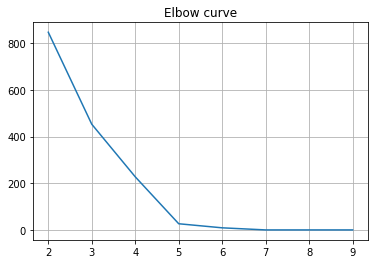

In [259]:
#mencari nilai k-means
df = df_standar
X = df[['Depok','Jakarta','Tangerang','Jarang','Sedang','Sering','Tidak Pernah']].values 
C = df['skor-pengeluaran'].values
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

#Diperoleh Frekuensi Dari Tiap Klaster

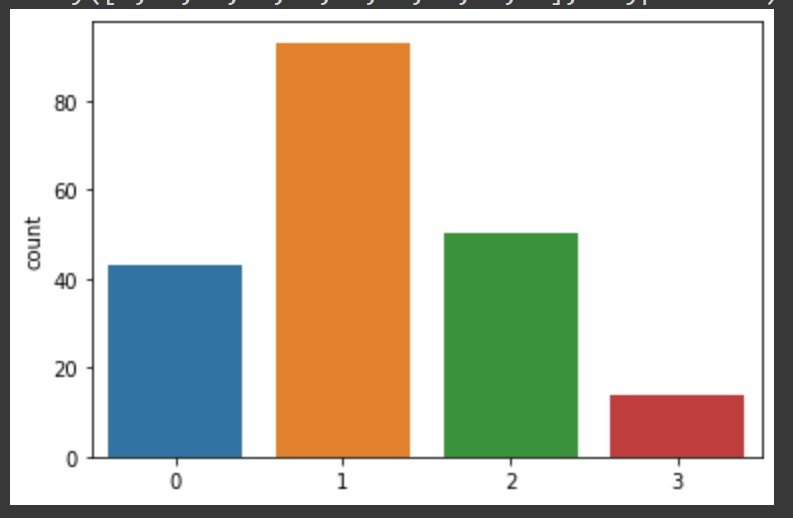

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


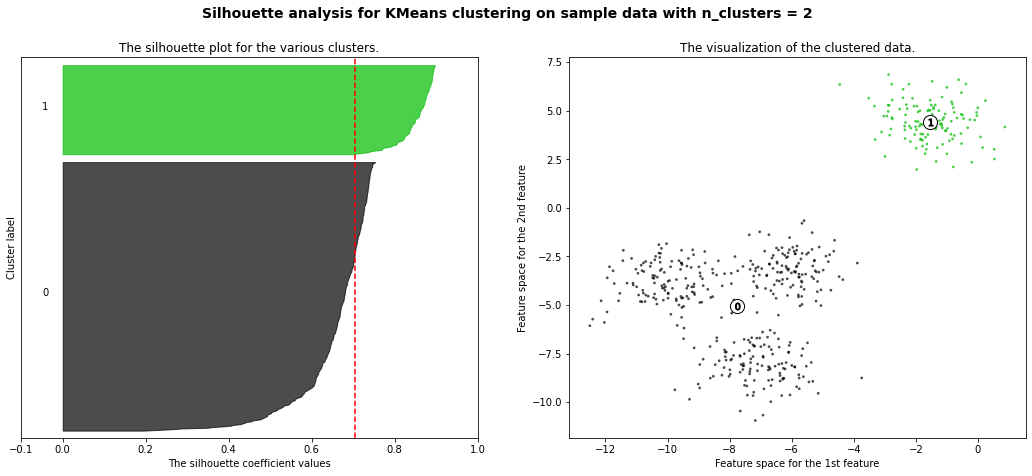

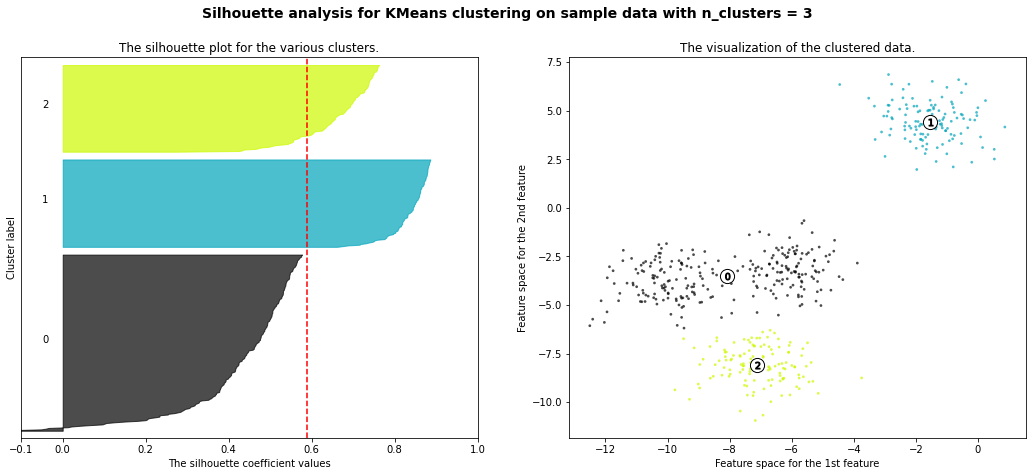

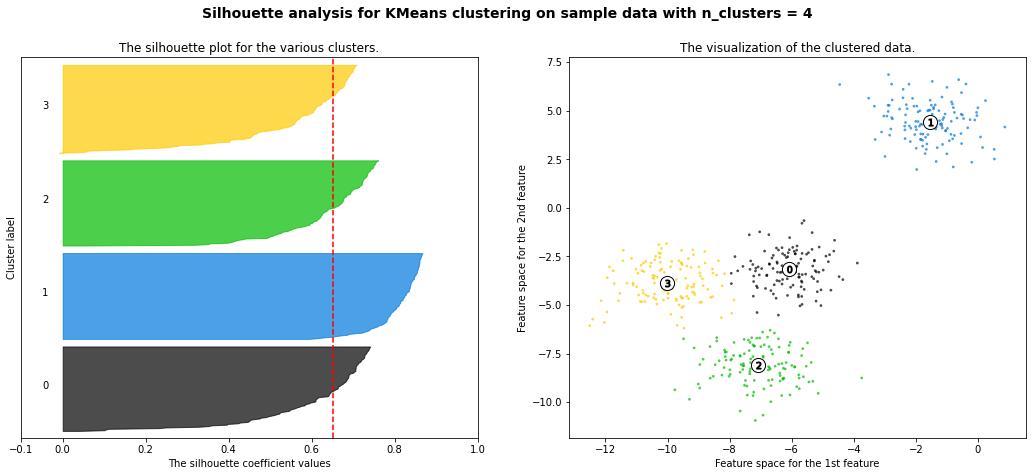

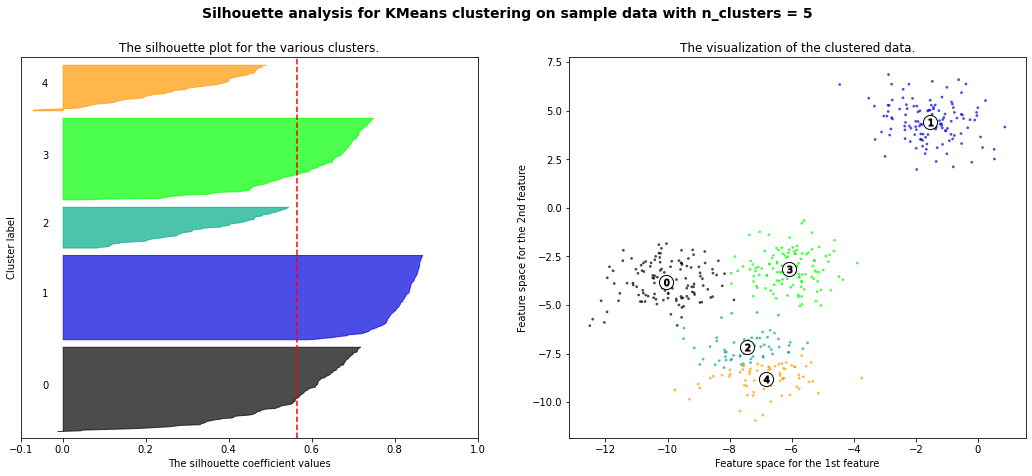

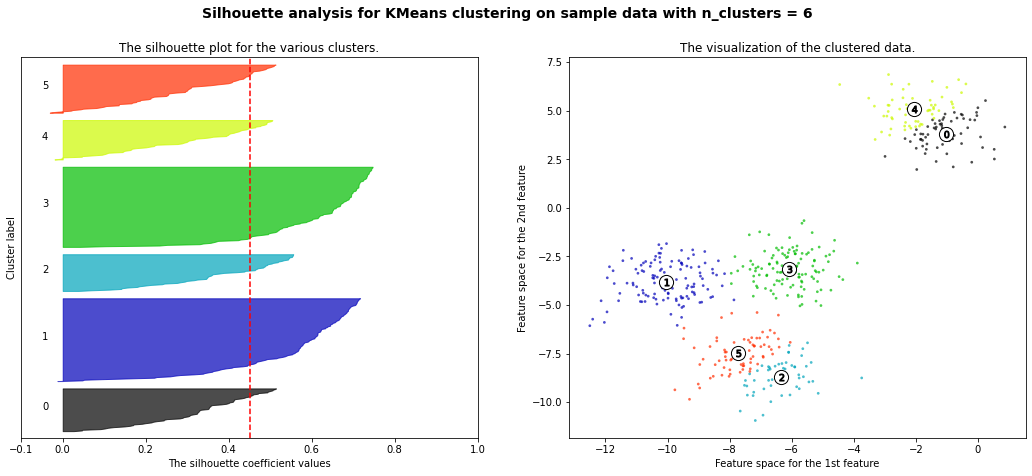

In [256]:
#Silhoutte
tau.sil_based_optimal_km()

Terlihat dari silhoutte n dengan jumlah 4 dapat menghasilkan informasi yang lebih berguna dan baik untuk perusahaan MixITup

#Diperoleh Hasil Klaster

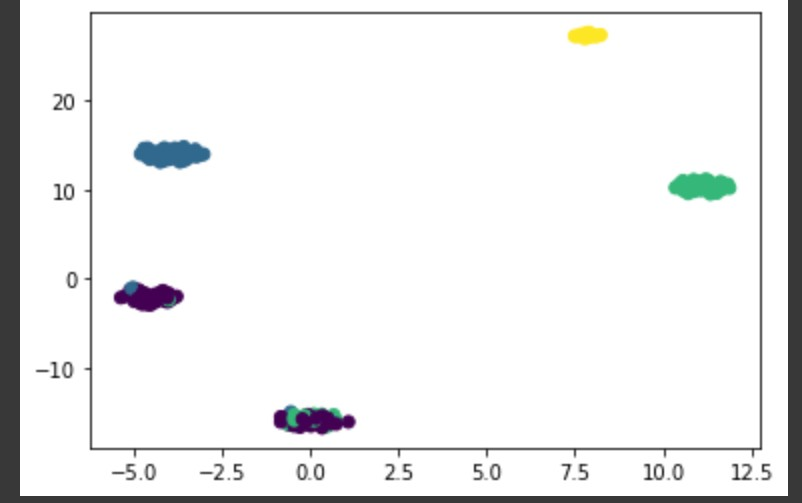

Terlihat terdapat 4 klaster yang terbentuk dimana:
- klaster dengan warna hijau memiliki kriteria customer:
-klaster dengan warna ungu memiliki kriteria customer:
- klaster dengan warna kuning memiliki kriteria customer:
- klaster dengan warna biru memiliki kriteria customer:

#Kesimpulan

- Disarankan untuk perusahaan MixITup dapat membuka cabang mereka yang baru di daerah Jawa Barat khususnya di depok dan sekitarnya